In [128]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
import sklearn as sk
%matplotlib inline

In [129]:
h = pd.read_csv("housing.csv")
h.head(10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [130]:
h.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [131]:
h.info()
h.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


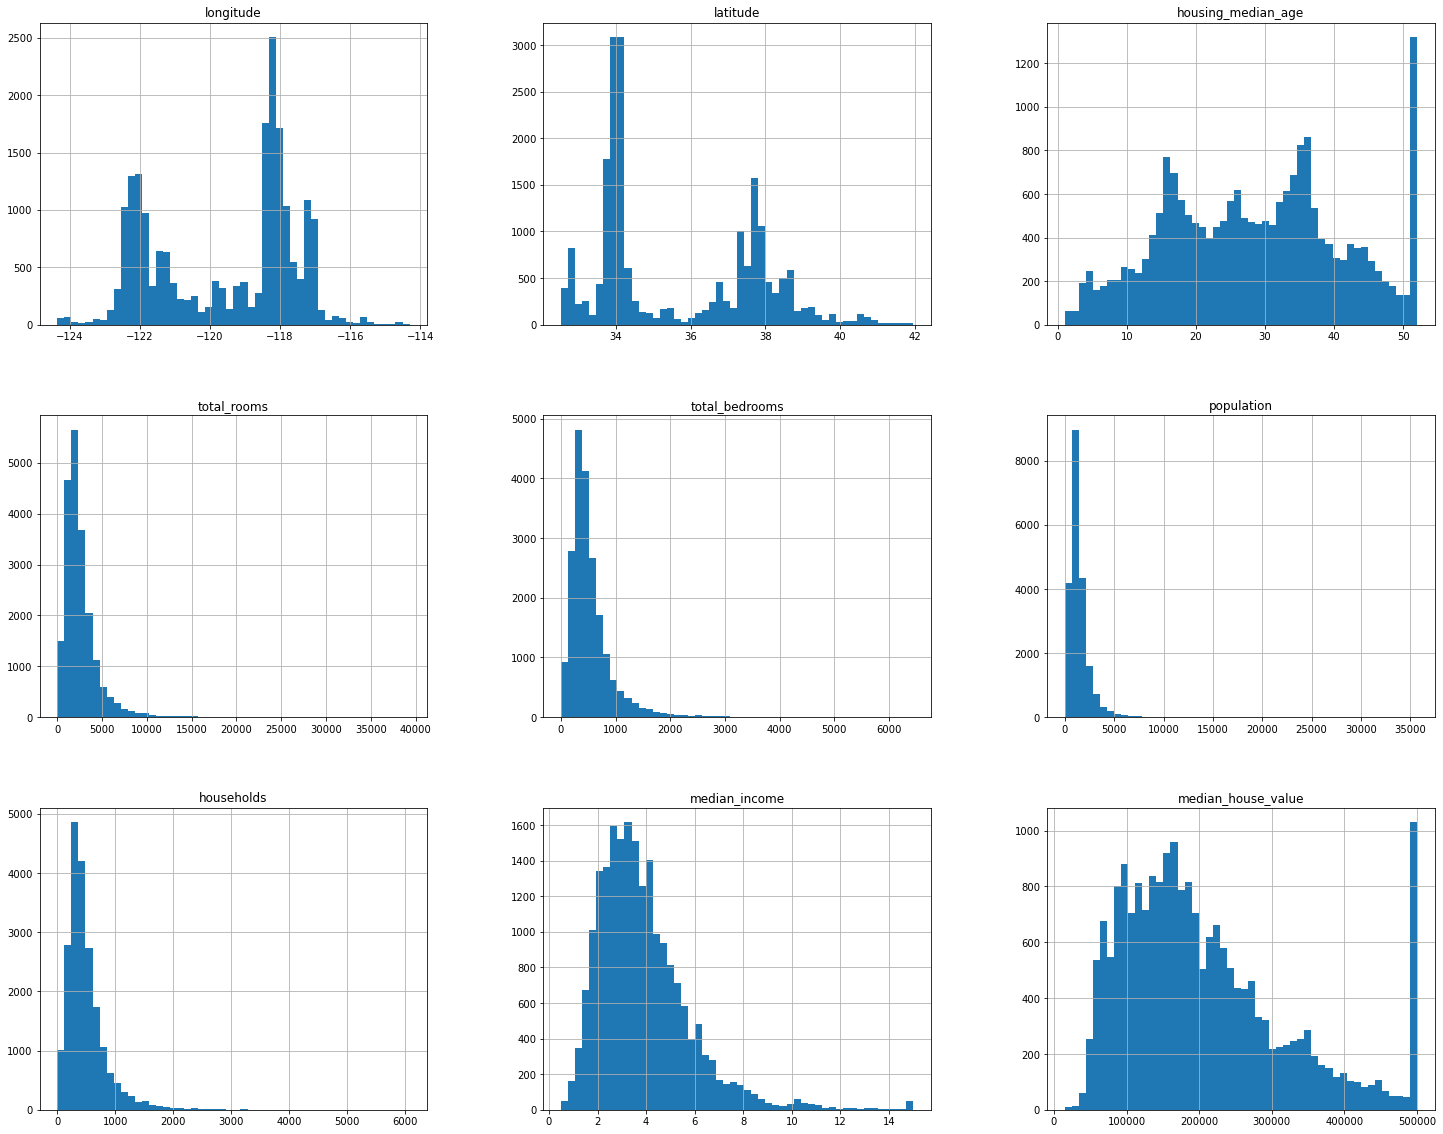

In [132]:
h.hist(bins=50, figsize=(25,20))
plt.show()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

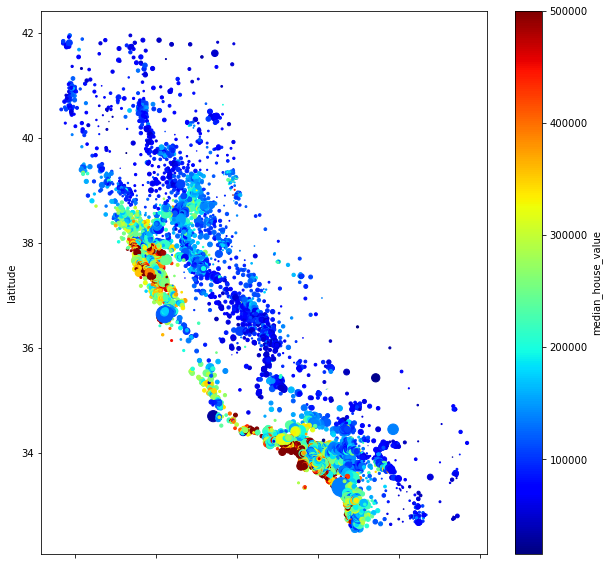

In [133]:
size = h.loc[:,'population']
h.plot(kind='scatter', x='longitude', y='latitude', c='median_house_value', s=(size/100), colormap = 'jet', figsize=(10,10))
#plt.colorbar()

<AxesSubplot:>

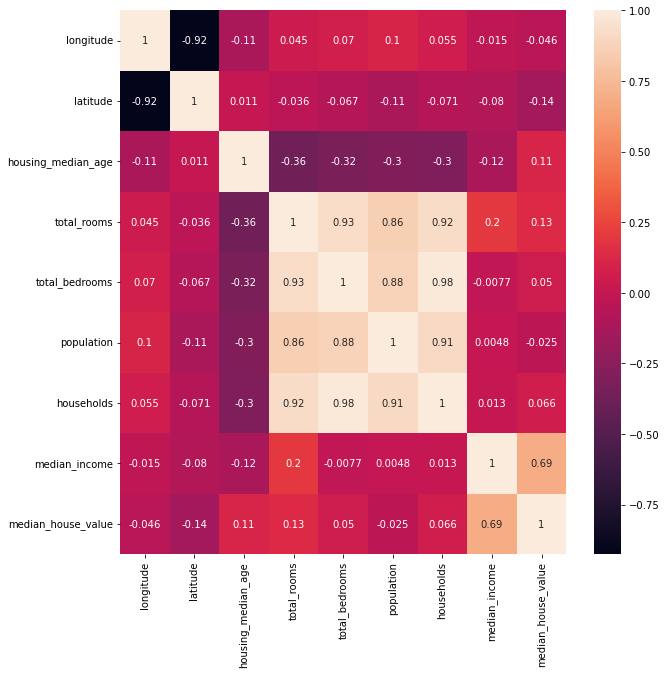

In [134]:
correlation_matrix = h.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data=correlation_matrix, annot=True)

In [135]:
value = correlation_matrix.loc[:,'median_house_value']
value_ranking = value.abs().sort_values(ascending = False)
value_ranking

median_house_value    1.000000
median_income         0.688075
latitude              0.144160
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
longitude             0.045967
population            0.024650
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='latitude', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='latitude', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='latitude'>,
        <AxesSubplot:xlabel='median_income', ylabel='latitude'>,
        <AxesSubplot:xlabel='latitude', ylabel='latitude'>]], dtype=object)

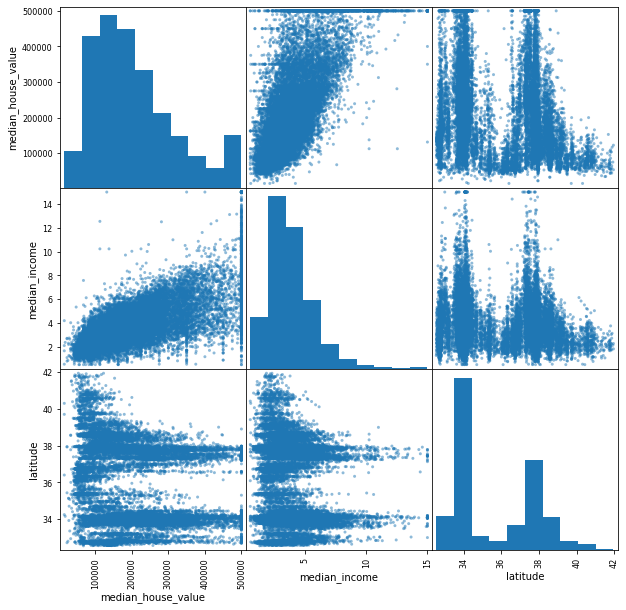

In [136]:
features = ['median_house_value', 'median_income', 'latitude']
pd.plotting.scatter_matrix(h[features], figsize=(10,10))

In [137]:
median_bedrooms = h['total_bedrooms'].median()
median_bedrooms
h.fillna(value = median_bedrooms, inplace = True)

In [138]:
h['rooms_per_household'] = (h['total_rooms']/h['households'])
h['bedrooms_per_household'] = (h['total_bedrooms']/h['households'])
h['popuation_per_household'] = (h['population']/h['households'])

In [139]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder(handle_unknown='ignore')

enc_df = pd.DataFrame(enc.fit_transform(h[['ocean_proximity']]).toarray())
h = h.join(enc_df)
h


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_household,popuation_per_household,0,1,2,3,4
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810,2.555556,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880,2.109842,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446,2.802260,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059,2.547945,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081,2.181467,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,1.133333,2.560606,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,1.315789,3.122807,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,1.120092,2.325635,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,1.171920,2.123209,0.0,1.0,0.0,0.0,0.0


In [140]:
h = h.drop('ocean_proximity', axis = 1)
h

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_household,popuation_per_household,0,1,2,3,4
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,1.023810,2.555556,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.971880,2.109842,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,1.073446,2.802260,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,1.073059,2.547945,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,1.081081,2.181467,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,5.045455,1.133333,2.560606,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,6.114035,1.315789,3.122807,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,5.205543,1.120092,2.325635,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,5.329513,1.171920,2.123209,0.0,1.0,0.0,0.0,0.0


In [141]:
from sklearn import model_selection
x = h
x = x.drop('median_house_value', axis = 1)
y = h.loc[:, 'median_house_value']

X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.2, train_size = 0.8, random_state = 42)


In [142]:
#Linear Regression
from sklearn import linear_model
from sklearn import metrics

linModel = linear_model.LinearRegression()
linModel.fit(X_train.values, y_train.values)

linPredict = linModel.predict(X_test.values)
linRMSE = np.sqrt(metrics.mean_squared_error(y_test, linPredict))
linR2 = metrics.r2_score(y_test, linPredict)

print("The RMSE of the linear model is ", linRMSE)
print("The R squared value of the linear model is ", linR2)


The RMSE of the linear model is  73398.92741071907
The R squared value of the linear model is  0.5888762489802164


In [143]:
#Ridge Regression

ridgeModel = linear_model.Ridge()
ridgeModel.fit(X_train.values, y_train.values)

ridgePredict = ridgeModel.predict(X_test.values)
ridgeRMSE = np.sqrt(metrics.mean_squared_error(y_test, ridgePredict))
ridgeR2 = metrics.r2_score(y_test, ridgePredict)

print("The RMSE of the ridge model is ", ridgeRMSE)
print("The R squared value of the ridge model is ", ridgeR2)

The RMSE of the ridge model is  73395.4088553592
The R squared value of the ridge model is  0.5889156644609743


In [144]:
#SVR Model

from sklearn import svm

svrModel = svm.SVR()
svrModel.fit(X_train.values, y_train.values)

svrPredict = svrModel.predict(X_test.values)
svrRMSE = np.sqrt(metrics.mean_squared_error(y_test, svrPredict))
svrR2 = metrics.r2_score(y_test, svrPredict)

print("The RMSE of the SVR model is ", svrRMSE)
print("The R squared value of the SVR model is ", svrR2)

The RMSE of the SVR model is  117230.9124989849
The R squared value of the SVR model is  -0.04876317802656138
